In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_dataset = pd.read_csv('data.csv')
original_dataset.describe()

,Seller,Buyer,Amt
count,708466.000000,708466.000000,7.084660e+05
mean,9495.510809,10689.271725,4.446489e+04
std,8593.744882,9125.190479,9.083406e+04
min,9.000000,1.000000,0.000000e+00
25%,2548.000000,2783.000000,1.006350e+04
50%,6814.000000,7880.000000,2.853200e+04
75%,14907.000000,17104.000000,6.294830e+04
max,32444.000000,32449.000000,5.030950e+07


### Preprocessing

**Drop transactions with value 0**

In [3]:
dataset = original_dataset.drop(original_dataset[original_dataset['Amt'] == 0].index)
dataset.describe()

,Seller,Buyer,Amt
count,707549.000000,707549.000000,7.075490e+05
mean,9501.940555,10696.489437,4.452252e+04
std,8594.180764,9126.080854,9.087879e+04
min,9.000000,1.000000,1.000000e-01
25%,2548.000000,2822.000000,1.010325e+04
50%,6814.000000,7883.000000,2.859330e+04
75%,14907.000000,17139.000000,6.301865e+04
max,32444.000000,32449.000000,5.030950e+07


### Performing benford analysis on the overall transactions

In [4]:
from math import log10

def benford_analysis(vals):
    # Expected Benford frequencies
    expected_freq = [round(len(vals) * log10(1 + 1/d)) for d in range(1, 10)]

    # Convert to scientific notation and get first digit
    first_digit = lambda x: int(('%e' % x)[0])

    # Get observed first digit frequencies
    observed_freq = [0] * 10
    for val in vals:
        observed_freq[first_digit(val)] += 1
    observed_freq = observed_freq[1:]

    print('Expected frequencies: ', expected_freq)
    print('Observed frequencies: ', observed_freq)
    
    plt.plot(range(1, 10), expected_freq, label='Expected')
    plt.plot(range(1, 10), observed_freq, label='Observed')
    plt.legend(loc='upper right')
    plt.show()
    
    mean_abs_dev = 1/(len(vals)*9) * sum([abs(obv-exp)
                                          for obv, exp in zip(observed_freq, expected_freq)])
    print('Mean absolute deviation: %.6lf' % mean_abs_dev)

Expected frequencies:  [212993, 124593, 88400, 68569, 56025, 47368, 41032, 36193, 32376]
Observed frequencies:  [215281, 85521, 72658, 82617, 71268, 55021, 46021, 40810, 38352]


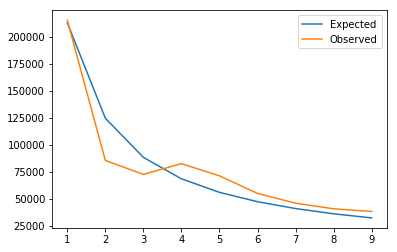

Mean absolute deviation: 0.017216


In [5]:
benford_analysis(dataset['Amt'])

$\text{Mean Absolute Deviation (MAD) is around 0.017 which implies a nonconformity between the expected probability and} \\ \text{the observed probability.}$

### Pruning the transaction graph

- We only consider the nodes (users) which have both incoming and outgoing edges.
- This is because our goal is to identify circular trading and nodes need to have both incoming and outgoing edges to be part of a cycle.

In [6]:
sellers = set(dataset['Seller'])
buyers = set(dataset['Buyer'])
seller_buyer_union = sellers.union(buyers)
seller_buyer_intersection = sellers.intersection(buyers)

print('Sellers:', len(sellers))
print('Buyers:', len(buyers))
print('Sellers Union Buyers:', len(seller_buyer_union))
print('Sellers Intersection Buyers:', len(seller_buyer_intersection))

Sellers: 8558
Buyers: 30511
Sellers Union Buyers: 32437
Sellers Intersection Buyers: 6632


In [7]:
import networkx as nx

In [17]:
G = nx.DiGraph()

for seller, buyer, amt in dataset[['Seller', 'Buyer', 'Amt']].values:
    if (seller in seller_buyer_intersection
            and buyer in seller_buyer_intersection):
        G.add_weighted_edges_from([(int(seller), int(buyer), amt)])

In [26]:
# To access edges with weights set data=True
G.edges(data=True)

OutEdgeDataView([(35, 4176, {'weight': 259357.0}), (35, 5378, {'weight': 26640.0}), (35, 5485, {'weight': 124689.8}), (35, 7549, {'weight': 101277.8}), (35, 9248, {'weight': 115893.3}), (35, 9962, {'weight': 55352.4}), (35, 11783, {'weight': 213294.5}), (35, 14268, {'weight': 150336.5}), (35, 15786, {'weight': 33099.7}), (35, 16038, {'weight': 101001.4}), (35, 19889, {'weight': 73402.2}), (35, 28316, {'weight': 89571.2}), (35, 30034, {'weight': 101789.6}), (4176, 13887, {'weight': 35964.0}), (4176, 14489, {'weight': 17892.0}), (5378, 102, {'weight': 73470.3}), (5378, 252, {'weight': 95053.7}), (5378, 1500, {'weight': 134160.0}), (5378, 3575, {'weight': 105200.0}), (5378, 3880, {'weight': 47700.0}), (5378, 3947, {'weight': 28125.0}), (5378, 4047, {'weight': 44930.0}), (5378, 5576, {'weight': 81795.0}), (5378, 7208, {'weight': 15989.0}), (5378, 7871, {'weight': 94005.7}), (5378, 8463, {'weight': 100230.0}), (5378, 8839, {'weight': 68847.7}), (5378, 10876, {'weight': 106200.0}), (5378, 11